## Data Analytics
### Lab 5.
Alicja Bogusz

In [153]:
import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True)  # only valid on Windows

from cmdstanpy import CmdStanModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed
Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


In [154]:
data_csv = pd.read_csv('Airline_data.csv')
data_csv

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [155]:
data_csv['Miles flown [100 mln miles]'] = (data_csv['Miles flown [100 mln miles]'] / 1000) - (data_csv['Miles flown [100 mln miles]'] /1000).mean()
data_csv

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,-1.8528
1,1977,25,516,-1.4158
2,1978,31,754,-0.6888
3,1979,31,877,-0.2348
4,1980,22,814,0.0982
5,1981,21,362,0.3172
6,1982,26,764,0.1612
7,1983,20,809,0.5072
8,1984,16,223,1.7172
9,1985,22,1066,1.3912


In [156]:
model_1 = CmdStanModel(stan_file='model_1.stan')
R = 1000
sim=model_1.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

DEBUG:cmdstanpy:Removing /content/model_1
10:10:58 - cmdstanpy - INFO - compiling stan file /content/model_1.stan to exe file /content/model_1
INFO:cmdstanpy:compiling stan file /content/model_1.stan to exe file /content/model_1
DEBUG:cmdstanpy:cmd: make /content/model_1
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/model_1.hpp /content/model_1.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/model_1.o /content/model_1.hpp


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_1', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmp9_psqxqb/model_1pjm9nk_x/model_1-20230420101108.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


10:11:08 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/model_1', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmp9_psqxqb/model_1pjm9nk_x/model_1-20230420101108.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9_psqxqb/model_1pjm9nk_x/model_1-20230420101108.csv
 console_msgs (if any):
	/tmp/tmp9_psqxqb/model_1pjm9nk_x/model_1-20230420101108_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      i

In [157]:
sim = sim.draws_pd()

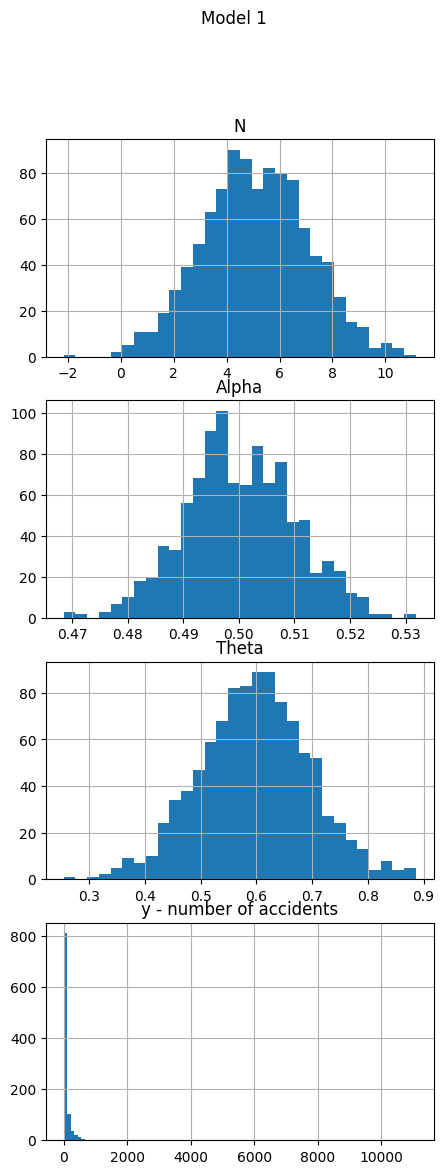

In [158]:
fig, axs = plt.subplots(4, figsize=(5, 13))
fig.suptitle('Model 1')

axs[0].hist(sim['N'], bins = 30)
axs[0].set_title("N")
axs[0].grid()

axs[1].hist(sim['alpha'], bins = 30)
axs[1].set_title("Alpha")
axs[1].grid()

axs[2].hist(sim['theta'], bins = 30)
axs[2].set_title("Theta")
axs[2].grid()

axs[3].hist(sim['y'], bins = 100)
axs[3].set_title("y - number of accidents")
axs[3].grid()

In [159]:
model_2 = CmdStanModel(stan_file='model_2.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [160]:
data={"N": data_csv.shape[0], 
      "miles": data_csv["Miles flown [100 mln miles]"].values, 
      "y": data_csv["Fatal accidents"].values}

fit = model_2.sample(data=data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_psqxqb/jfzwav1j.json
DEBUG:cmdstanpy:cmd: /content/model_2 info
cwd: None
10:11:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_2', 'id=1', 'random', 'seed=59856', 'data', 'file=/tmp/tmp9_psqxqb/jfzwav1j.json', 'output', 'file=/tmp/tmp9_psqxqb/model_24u98qhz1/model_2-20230420101110_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_2', 'id=2', 'random', 'seed=59856', 'data', 'file=/tmp/tmp9_psqxqb/jfzwav1j.json', 'output', 'file=/tmp/tmp9_psqxqb/model_24u98qhz1/model_2-20230420101110_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_2', 'id=3', 'random', 'seed=59856', 'data', 'file=/tmp/tmp9_psqxqb/jfzwav1j.json', 'output', 'file=/tmp/tmp9_psqxqb/model_24u98qhz1/model_2-20230420101110_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'enga

10:11:10 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/model_2', 'id=1', 'random', 'seed=59856', 'data', 'file=/tmp/tmp9_psqxqb/jfzwav1j.json', 'output', 'file=/tmp/tmp9_psqxqb/model_24u98qhz1/model_2-20230420101110_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9_psqxqb/model_24u98qhz1/model_2-20230420101110_1.csv
 console_msgs (if any):
	/tmp/tmp9_psqxqb/model_24u98qhz1/model_2-20230420101110_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 

In [161]:
fit = fit.draws_pd()
fit

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],...,y_sample[1],y_sample[2],y_sample[3],y_sample[4],y_sample[5],y_sample[6],y_sample[7],y_sample[8],y_sample[9],y_sample[10]
0,466.087,0.901661,0.779062,3.0,7.0,0.0,-463.738,2.85077,-0.137729,22.3304,...,11.0,23.0,20.0,22.0,22.0,21.0,26.0,11.0,18.0,19.0
1,466.590,1.000000,0.779062,1.0,1.0,0.0,-466.089,2.82485,-0.136047,21.6915,...,18.0,20.0,18.0,14.0,17.0,15.0,21.0,17.0,16.0,15.0
2,466.590,0.901127,0.779062,1.0,1.0,0.0,-466.113,2.82485,-0.136047,21.6915,...,24.0,21.0,15.0,22.0,21.0,16.0,12.0,14.0,18.0,9.0
3,466.206,0.588604,0.779062,3.0,7.0,0.0,-461.227,2.83605,0.013389,16.6306,...,18.0,15.0,15.0,14.0,16.0,15.0,14.0,12.0,15.0,18.0
4,466.913,1.000000,0.779062,2.0,3.0,0.0,-466.329,2.81826,-0.019446,17.3621,...,18.0,20.0,21.0,17.0,17.0,14.0,14.0,15.0,11.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,465.410,0.732371,0.894997,2.0,3.0,0.0,-465.188,2.66106,-0.144887,18.7185,...,15.0,20.0,18.0,13.0,14.0,14.0,18.0,18.0,3.0,16.0
3996,466.781,0.926075,0.894997,2.0,3.0,0.0,-464.549,2.78712,-0.147746,21.3460,...,22.0,14.0,14.0,17.0,16.0,18.0,17.0,15.0,16.0,17.0
3997,466.758,0.894334,0.894997,2.0,3.0,0.0,-465.570,2.81108,-0.136788,21.4242,...,16.0,17.0,20.0,16.0,17.0,19.0,19.0,11.0,12.0,16.0
3998,467.220,0.959938,0.894997,2.0,3.0,0.0,-466.418,2.74004,-0.099858,18.6353,...,15.0,21.0,10.0,16.0,16.0,15.0,22.0,14.0,12.0,9.0


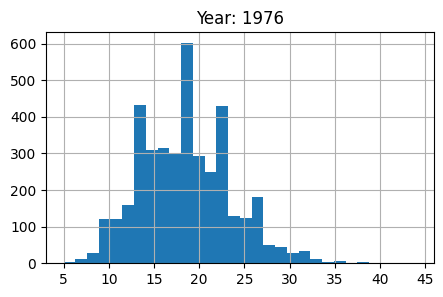

Observed value - 24
Mean value - 18.49


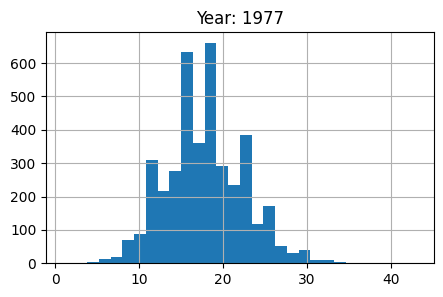

Observed value - 25
Mean value - 17.739


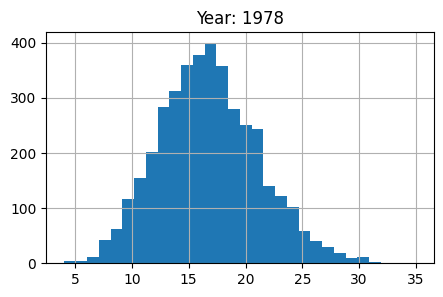

Observed value - 31
Mean value - 16.859


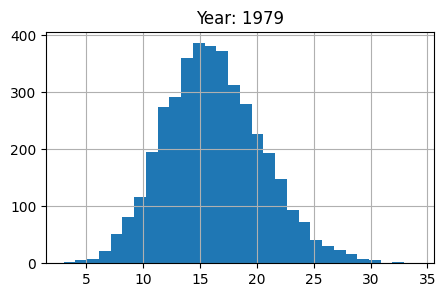

Observed value - 31
Mean value - 16.2705


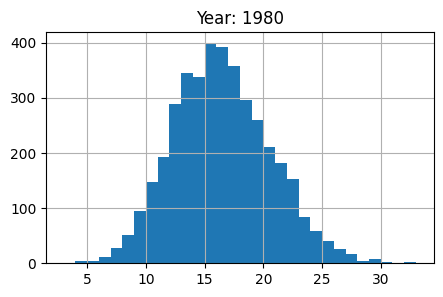

Observed value - 22
Mean value - 15.95675


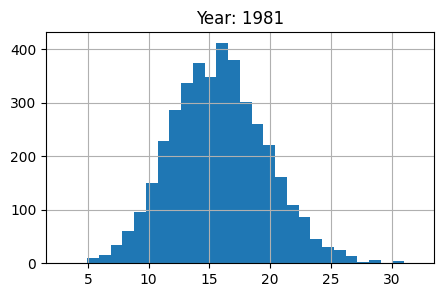

Observed value - 21
Mean value - 15.72825


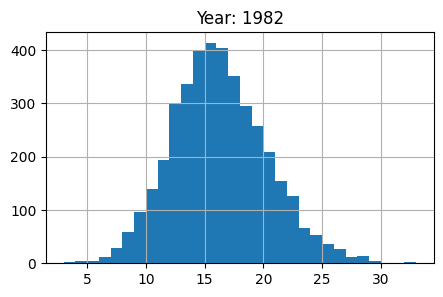

Observed value - 26
Mean value - 15.7775


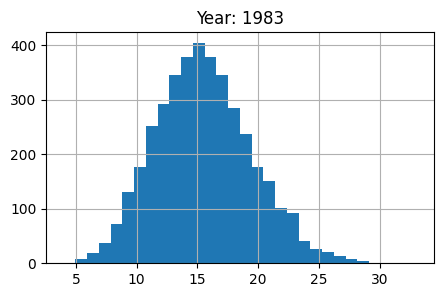

Observed value - 20
Mean value - 15.41025


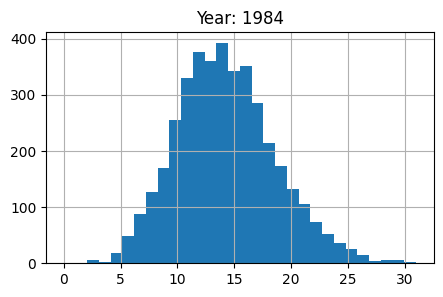

Observed value - 16
Mean value - 14.327


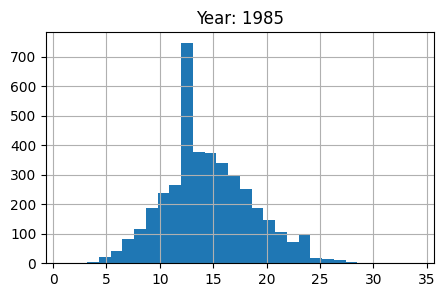

Observed value - 22
Mean value - 14.501


In [162]:
years_list = data_csv['Year'].values

for i in range(0, len(data_csv)):
    y_sample = "y_sample[" + str(i+1) + "]"

    plt.figure(i, figsize=(5,3))
    plt.hist(fit[y_sample], bins=30)
    plt.title('Year: {}'.format(years_list[i]))
    plt.grid()
    plt.show()

    print('Observed value - {0}'.format(data_csv["Fatal accidents"][i]))
    print('Mean value - {0}'.format(fit[y_sample].mean()))

In [163]:
model_3 = CmdStanModel(stan_file='model_3.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [164]:
data={"N": data_csv.shape[0], 
      "miles": data_csv["Miles flown [100 mln miles]"].values, 
      "y": data_csv["Fatal accidents"].values}

fit_2 = model_3.sample(data=data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_psqxqb/kx14f_pk.json
DEBUG:cmdstanpy:cmd: /content/model_3 info
cwd: None
10:11:15 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_3', 'id=1', 'random', 'seed=65583', 'data', 'file=/tmp/tmp9_psqxqb/kx14f_pk.json', 'output', 'file=/tmp/tmp9_psqxqb/model_3aq6jpbk6/model_3-20230420101115_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_3', 'id=2', 'random', 'seed=65583', 'data', 'file=/tmp/tmp9_psqxqb/kx14f_pk.json', 'output', 'file=/tmp/tmp9_psqxqb/model_3aq6jpbk6/model_3-20230420101115_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_3', 'id=3', 'random', 'seed=65583', 'data', 'file=/tmp/tmp9_psqxqb/kx14f_pk.json', 'output', 'file=/tmp/tmp9_psqxqb/model_3aq6jpbk6/model_3-20230420101115_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'enga

10:11:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/model_3', 'id=1', 'random', 'seed=65583', 'data', 'file=/tmp/tmp9_psqxqb/kx14f_pk.json', 'output', 'file=/tmp/tmp9_psqxqb/model_3aq6jpbk6/model_3-20230420101115_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9_psqxqb/model_3aq6jpbk6/model_3-20230420101115_1.csv
 console_msgs (if any):
	/tmp/tmp9_psqxqb/model_3aq6jpbk6/model_3-20230420101115_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 

In [165]:
fit_2 = fit_2.draws_pd()

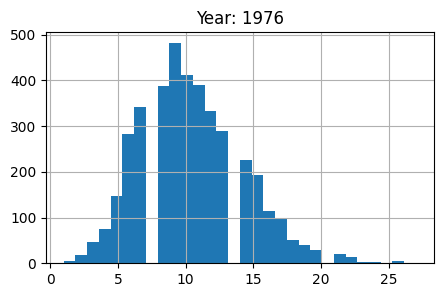

Observed value - 24
Mean value - 10.41675


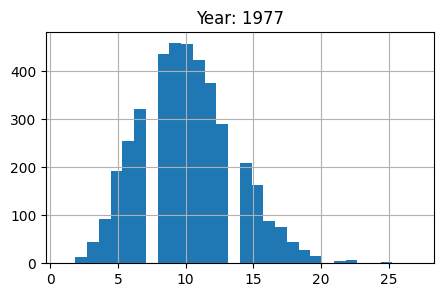

Observed value - 25
Mean value - 10.119


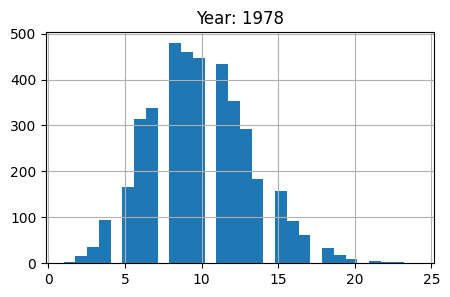

Observed value - 31
Mean value - 9.931


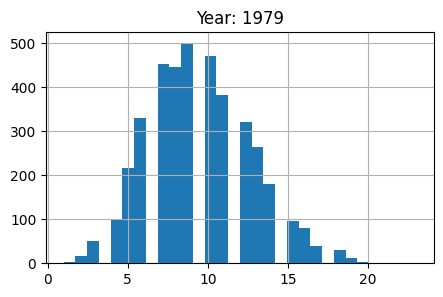

Observed value - 31
Mean value - 9.48375


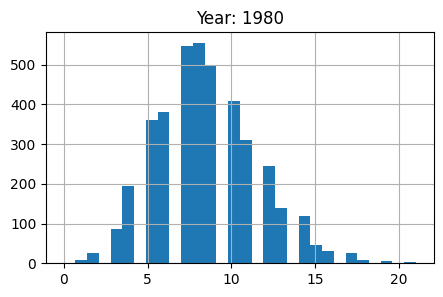

Observed value - 22
Mean value - 8.442


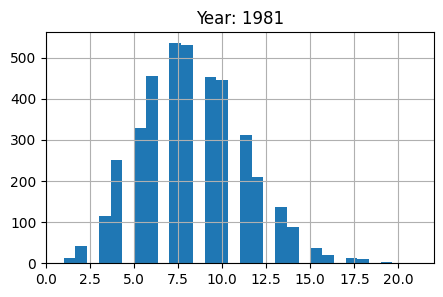

Observed value - 21
Mean value - 8.16775


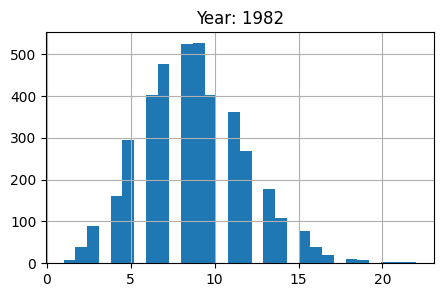

Observed value - 26
Mean value - 8.6955


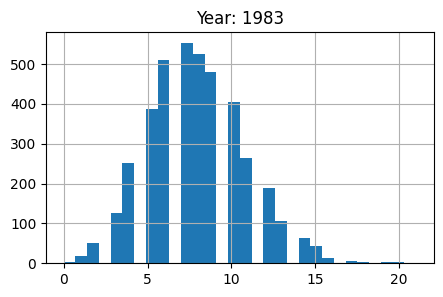

Observed value - 20
Mean value - 7.863


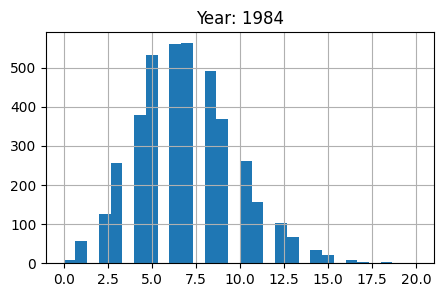

Observed value - 16
Mean value - 6.817


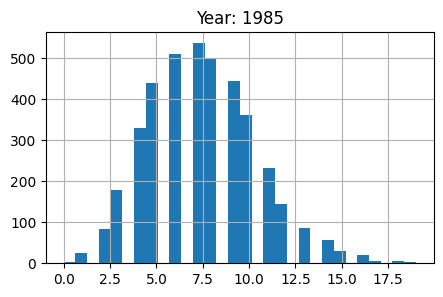

Observed value - 22
Mean value - 7.48275


In [166]:
years_list = data_csv['Year'].values

for i in range(0, len(data_csv)):
    y_sample = "y_sample[" + str(i+1) + "]"

    plt.figure(i, figsize=(5,3))
    plt.hist(fit_2[y_sample], bins=30)
    plt.title('Year: {}'.format(years_list[i]))
    plt.grid()
    plt.show()

    print('Observed value - {0}'.format(data_csv["Fatal accidents"][i]))
    print('Mean value - {0}'.format(fit_2[y_sample].mean()))